# Fashion MNIST com *Multilayer Perceptron* (MLP)

- **Aluna:** Bárbara Neves
- **Matrícula: 388713**

Esta atividade consiste em implementar uma rede MLP usando a biblioteca *Keras* para resolver a classificação do Fashion MNIST. Será feito: 
1. o cálculo da acurácia do modelo; e,
* impressão da acurácia e da *loss* para cada época treinada.

## Imports Iniciais

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv


## Leitura e Análise do *Dataset*

In [2]:
df_train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train.shape

(60000, 785)

In [4]:
df_test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.shape

(10000, 785)

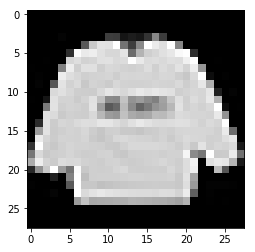

In [6]:
# Imprimindo um objeto do dataset
plt.imshow(df_train.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

## Pré-processamento

### Separação dos Dados

In [7]:
X_train, y_train = df_train.values[10000: , 1:], df_train.values[10000: , 0]
X_val, y_val = df_train.values[:10000 , 1:], df_train.values[:10000 , 0]
X_test, y_test = df_test.values[:, 1:], df_test.values[:, 0]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((50000, 784), (50000,), (10000, 784), (10000,), (10000, 784), (10000,))

### Normalização dos Dados

#### Conjunto de treino *sem* normalização

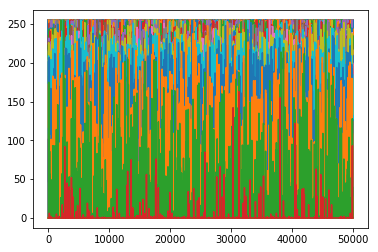

In [8]:
plt.plot(X_train);

#### Conjunto de validação *sem* normalização

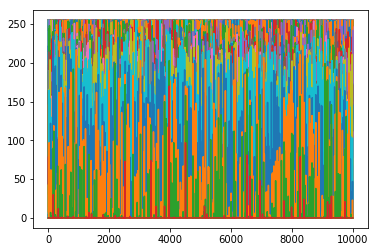

In [9]:
plt.plot(X_val);

#### Conjunto de teste *sem* normalização

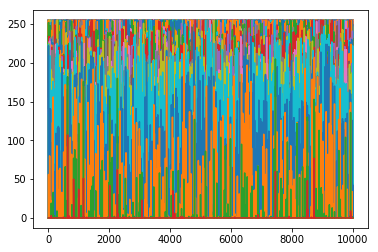

In [10]:
plt.plot(X_test);

#### Normalizando os dados

In [11]:
from sklearn.preprocessing import Normalizer

X_train = Normalizer().fit_transform(X_train)
X_val = Normalizer().fit_transform(X_val)
X_test = Normalizer().fit_transform(X_test)

#### Conjunto de treino *com* normalização

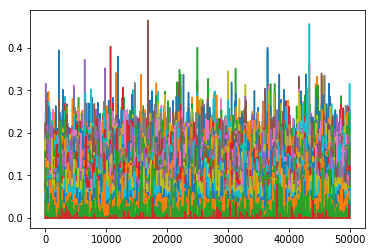

In [12]:
plt.plot(X_train);

#### Conjunto de validação *com* normalização

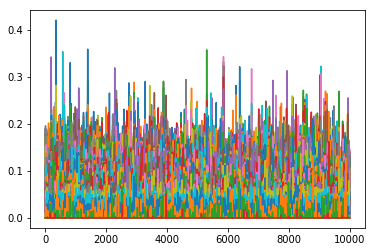

In [13]:
plt.plot(X_val);

#### Conjunto de teste *com* normalização

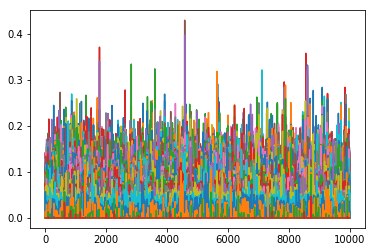

In [14]:
plt.plot(X_test);

## Criação do Modelo

In [15]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Using TensorFlow backend.


### Acurácia e *loss* para cada época que foi treinada

In [16]:
historic_epochs = model.fit(X_train, y_train, epochs=80, batch_size=16, verbose=0)
value_loss, value_accuracy = model.evaluate(X_val, y_val)

10000/10000 [==============================] - 1s 64us/step


In [17]:
historic_epochs.history

{'loss': [0.5841746781516075,
  0.4201127133333683,
  0.3824644738692045,
  0.3585867097902298,
  0.3439191371279955,
  0.33318430667221544,
  0.3269929375584796,
  0.32266480137500914,
  0.31887730871357023,
  0.31429076738625766,
  0.31226733588263395,
  0.30849177911091596,
  0.30844976233780386,
  0.3085963935612887,
  0.30641917471718044,
  0.30214095899512994,
  0.3038643067073822,
  0.30304175311736764,
  0.3013610562725365,
  0.30244053291261197,
  0.2978408421203401,
  0.2980937085656077,
  0.2981184592080861,
  0.2943453502281848,
  0.2956893688645959,
  0.2920879939881712,
  0.2927513482570695,
  0.2913221093360335,
  0.28734851276177914,
  0.28822287493801674,
  0.290999331665691,
  0.2871715707796067,
  0.2853834010446211,
  0.2900728238986619,
  0.2833588198332395,
  0.2839695356825553,
  0.2840189385168068,
  0.2839993351988867,
  0.2763792002224736,
  0.27761994405366947,
  0.28108748379705417,
  0.27405120594886134,
  0.2749740205993969,
  0.27531444496290175,
  0.2733

In [18]:
loss, accuracy = historic_epochs.history['loss'], historic_epochs.history['accuracy']

#### Gráficos da acurácia e da *loss*

Text(0.5, 1.0, 'Accuracy')

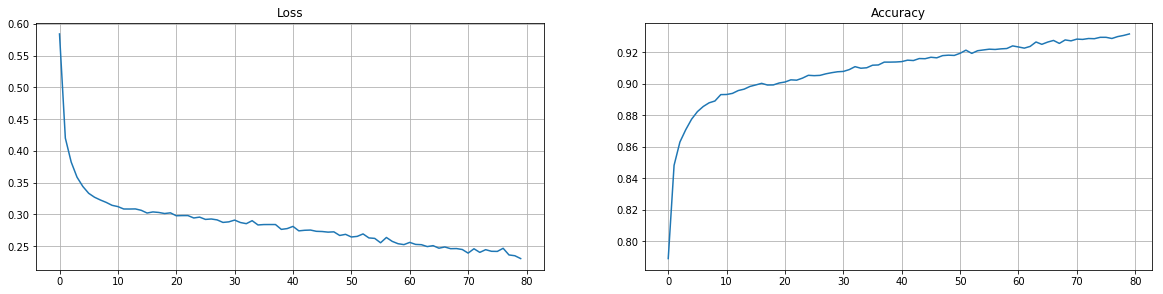

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(221);
plt.plot(range(0,80), loss)
plt.grid(True)
plt.title('Loss')


plt.subplot(222); 
plt.plot(range(0,80), accuracy)
plt.grid(True)
plt.title('Accuracy')

#### *Loss* e acurácia do modelo

In [20]:
value_loss, value_accuracy

(1.0523206889986991, 0.8744000196456909)